In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Advertising.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

In [3]:
df.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>

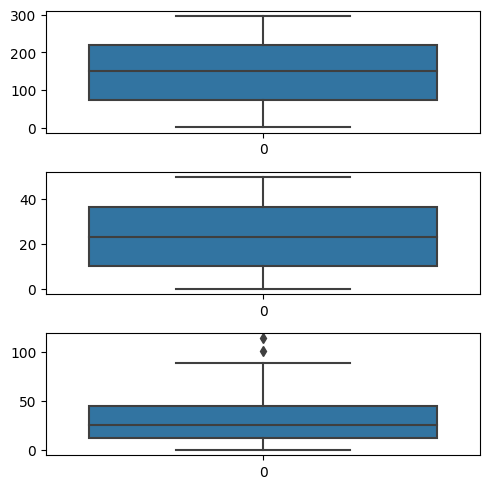

In [4]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

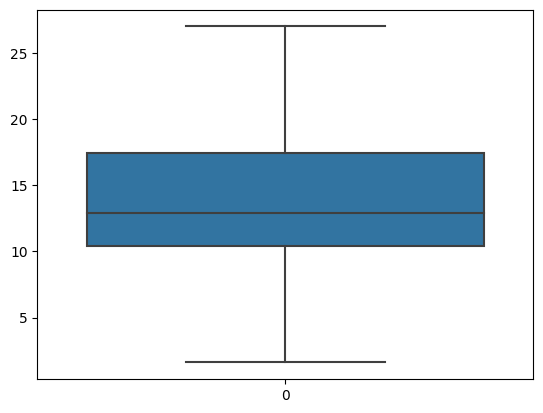

In [5]:
sns.boxplot(df['Sales'])
plt.show()

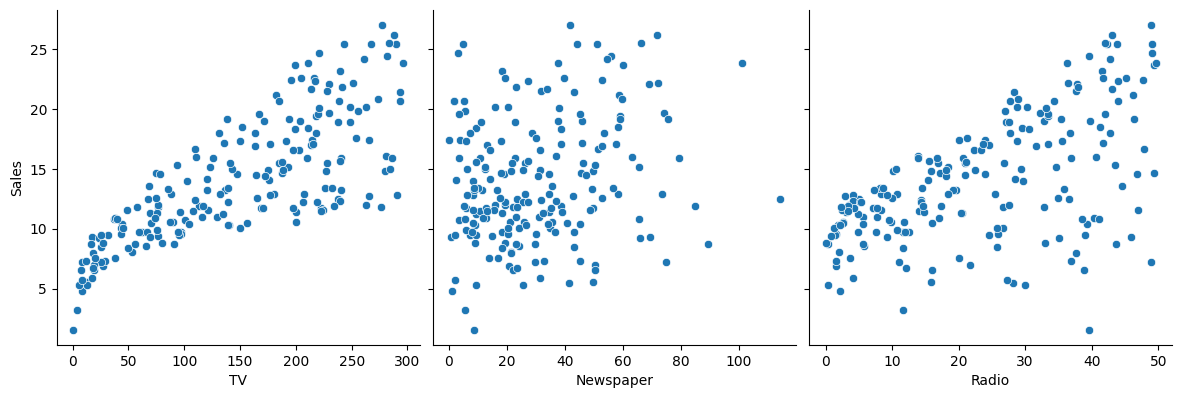

In [6]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

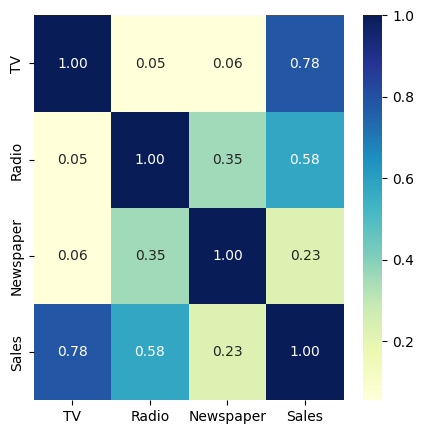

In [7]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.show()

In [8]:
X=df['TV']
y=df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=100)

In [9]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [10]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           2.84e-30
Time:                        04:45:55   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

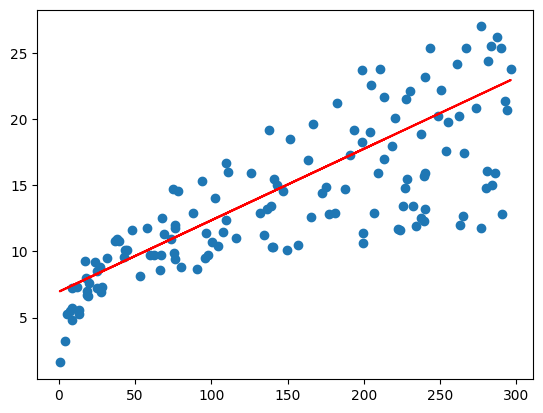

In [11]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show